# 🕴️Title and Executive Summary 

## Twitch Streamers Analysis

We are data analysts at Twitch, the biggest live-video streaming platform for video games in the US. With that, you know you have data of more than 31 million viewers daily such as, who they are watching, how long they are watching, who they follow, etc. Your boss tells you, they want to learn more about the audiences that engage with the biggest streamers who are on their site, and who is watching them.

> Your boss asks you to find out a few things about the TOP 1000 streamers on the platform. 

- How does a stream’s average viewership relate to the number of followers? (Scatterplot & Plotly)

- What is the spread of watch time across the Top 1000 streams? (Histogram)

- Do partnered streamers get higher peak viewership than non-partnered streamers? (Box-plot)

- How does average viewership change by language, and then by partnership status? (Multipanel figure)

- Which languages dominate the Top 1000 streams? (Bar chart)



## Data Card

Title: Top 1000 Streamers from 2020

Source with a link: 
From the Website Kaggle, presented by Aayush Mishra 
https://www.kaggle.com/datasets/aayushmishra1512/twitchdata

The data set has the following fields: 
1. Channel : Name of Channel
2. Watch time (minutes)
3. Stream time (minutes) 
4. Peak viewers : Highest number of viewers they had at one moment 
5. Average Viewers : Average viewers every stream
6. Followers : Number of total followers
7. Followers gained 
8. Views gained 
9. Partnered (With Twitch) 
10. Mature : Classified as over 18 content 
11. Language : Language the stream is in. 

License: 
CC0: Public Domain

## Loading and File IO

In [ ]:
# 🚀 Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
  import plotly.express as px
  import plotly.graph_objects as go
  PLOTLY_AVAILABLE = True
except ImportError:
  PLOTLY_AVAILABLE = False
  print("Note: Plotly not available. Interactive visualizations will be skipped.")

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [ ]:
df = pd.read_csv("data/twitchdata-update.csv")

def load_csv(path: str) -> pd.DataFrame:  #converting to pandas dataframe function path: is asking for what type the input will be 
    try:
        df = pd.read_csv(path) #Try to turn the CSV into pandas dataframe and if successful save it as DF. 
    except FileNotFoundError as e:
        raise FileNotFoundError(f"Could not find {path}. check data/ folder and filename.") from e
    except pd.errors.ParserError as e:
        raise ValueError(f"Parsing failed for {path}. check delimiter or bad rows.") from e
    else:
        return df

In [ ]:
print(df.head()) #Making sure it is working and is a dataframe

    Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     

# Simplified Exploratory Data Analysis (EDA)

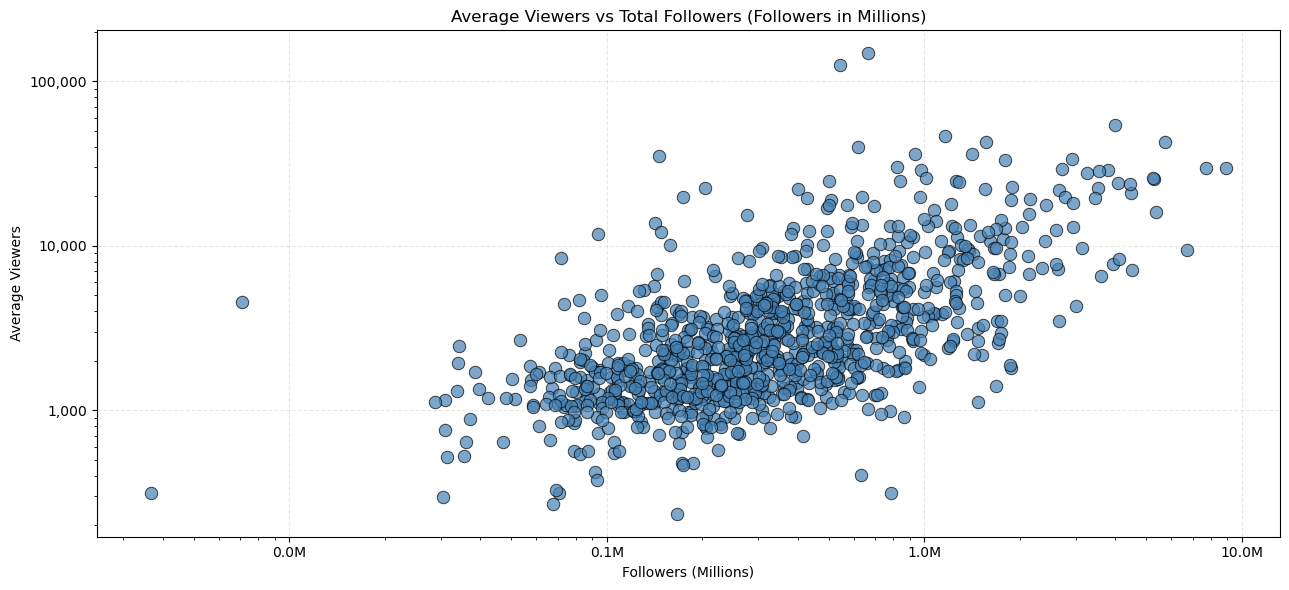

In [ ]:
# How does a stream’s average viewership relate to the number of followers? (Scatterplot & Plotly)

import matplotlib.ticker as ticker #Changes Labels to be more readable 

AvgView = df["Average viewers"] #Stores Average Viewers in the dataframe into a variable
NumFollow = df["Followers"] #Stores Followers in the dataframe into a variable

df["Followers_Millions"] = df["Followers"] / 1_000_000 #Followers are divided into millions

fig, ax = plt.subplots(figsize=(13, 6)) #Sets size

sns.scatterplot(  #Creates the scatterplot 
    data=df,
    x="Followers_Millions",
    y="Average viewers",
    color="steelblue",
    edgecolor="black",
    alpha=0.7,
    s=80
)

ax.set_xscale('log') #Both spread out large numbers 
ax.set_yscale('log')


ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{x:.1f}M")  #Both give clear numbers rather than numbers with base 10 and exponents.
)
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f"{int(y):,}")
)

plt.title("Average Viewers vs Total Followers (Followers in Millions)")
plt.xlabel("Followers (Millions)")
plt.ylabel("Average Viewers")
ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()



In [8]:
import plotly.express as px
import numpy as np

fig = px.scatter(
    df,
    x="Followers",
    y="Average viewers",
    color="Language",
    hover_name="Channel",
    size="Average viewers",
    log_x=True,
    log_y=True,
    title="Average Viewers vs Followers (Log-Log Interactive)"
)

fig.show()